In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.preprocessing import StandardScaler

In [98]:
data = pd.read_csv('smoking.csv', index_col='ID')
print(data.shape)
data.head()

(55692, 26)


gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
ID                                                                  
0       F   40         155          60       81.3             1.2   
1       F   40         160          60       81.0             0.8   
2       M   55         170          60       80.0             0.8   
3       M   40         165          70       88.0             1.5   
4       F   40         155          60       86.0             1.0   

    eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
ID                                                            ...               
0               1.0            1.0             1.0     114.0  ...        12.9   
1               0.6            1.0             1.0     119.0  ...        12.7   
2               0.8            1.0             1.0     138.0  ...        15.8   
3               1.5            1.0             1.0     100.0  ...        14.7   
4               1.0            1.0             1.0     120.0  ...        12.5   

    Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
ID                                                                           
0             1.0               0.7  18.0  19.0  27.0     Y              0   
1             1.0               0.6  22.0  19.0  18.0     Y              0   
2             1.0               1.0  21.0  16.0  22.0     Y              0   
3             1.0               1.0  19.0  26.0  18.0     Y              0   
4             1.0               0.6  16.0  14.0  22.0     Y              0   

    tartar  smoking  
ID                   
0        Y        0  
1        Y        0  
2        N        1  
3        Y        0  
4        N        0  

[5 rows x 26 columns]

In [99]:
data.info() # 无缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

##### 分类型变量 
1. 标签y
2. 性别gender
3. 口语oral
4. 牙垢tartar

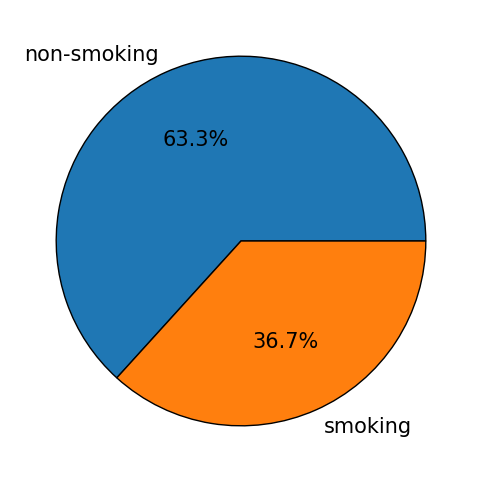

In [100]:
# 吸烟结构图
df1 = data['smoking'].copy()
df1 = df1.apply(lambda x:'smoking' if x==1 else 'non-smoking')
state_names = df1.value_counts().index
no_of_state = df1.value_counts()
plt.gcf().set_size_inches(6,6)
patches,l_text,p_text = plt.pie(no_of_state,labels=state_names,autopct="%1.1f%%",
        wedgeprops={'edgecolor':'black'},explode=[0,0])

for t in p_text:
    t.set_size(15)

for t in l_text:
    t.set_size(15)
plt.savefig('./plot/smoking_pie.jpg')
plt.show()

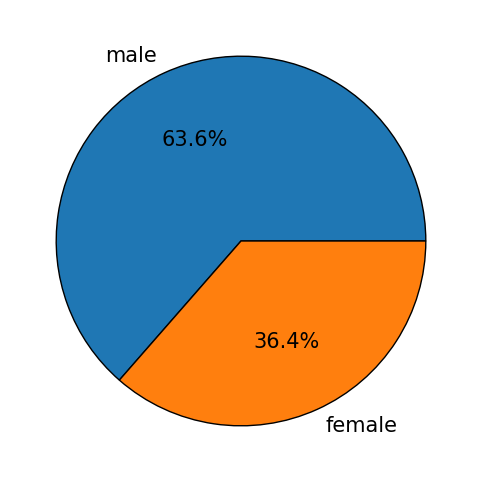

In [68]:
# 性别结构图
df2 = data['gender'].copy()
df2 = df2.apply(lambda x:'male' if x=='M' else 'female')
state_names=df2.value_counts().index
no_of_state=df2.value_counts()
plt.gcf().set_size_inches(6,6)
patches,l_text,p_text = plt.pie(no_of_state,labels=state_names,autopct="%1.1f%%",
        wedgeprops={'edgecolor':'black'},explode=[0,0])

for t in p_text:
    t.set_size(15)

for t in l_text:
    t.set_size(15)
plt.savefig('./plot/gender_pie.jpg')
plt.show()

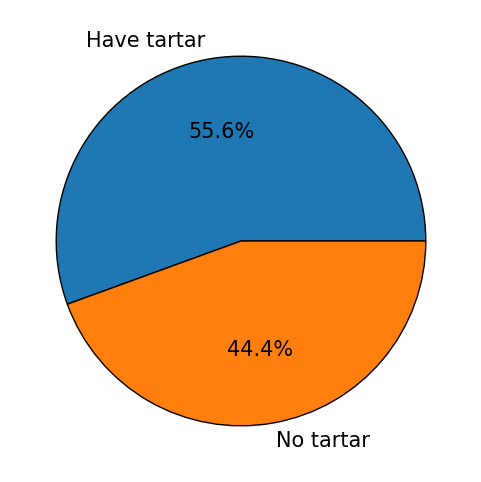

In [69]:
# 牙垢结构图
df3 = data['tartar'].copy()
df3 = df3.apply(lambda x:'Have tartar' if x=='Y' else 'No tartar')
state_names=df3.value_counts().index
no_of_state=df3.value_counts()
plt.gcf().set_size_inches(6,6)
patches,l_text,p_text = plt.pie(no_of_state,labels=state_names,autopct="%1.1f%%",
        wedgeprops={'edgecolor':'black'},explode=[0,0])

for t in p_text:
    t.set_size(15)

for t in l_text:
    t.set_size(15)
plt.savefig('./plot/tartar_pie.jpg')
plt.show()

In [70]:
# 口语能力
data['oral'].describe()  #无变异性

count     55692
unique        1
top           Y
freq      55692
Name: oral, dtype: object

In [75]:
data.drop(['oral'], axis=1, inplace=True)
print(data.shape)

(55692, 25)


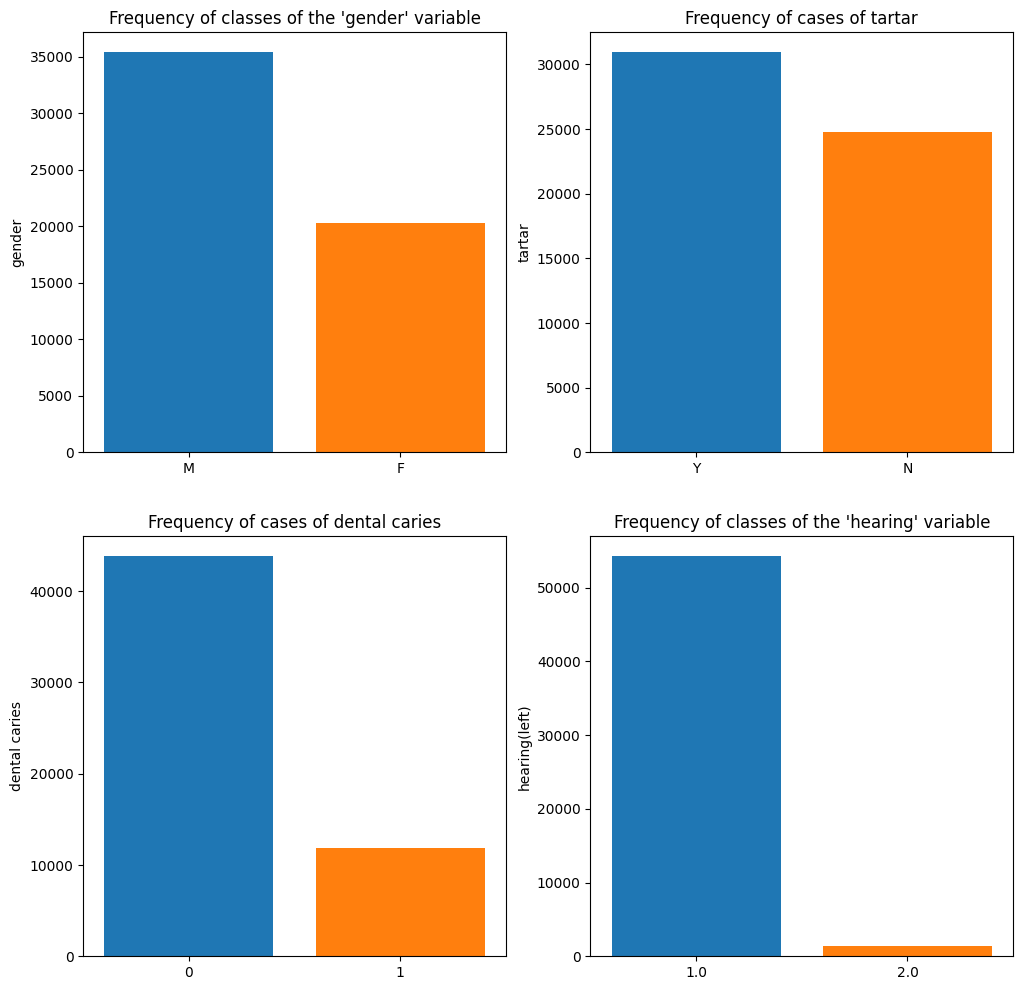

In [102]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = data["gender"].value_counts().index,
            y = data["gender"].value_counts(),
            data = data, saturation = 1).set(title = "Frequency of classes of the 'gender' variable");

sns.barplot(ax = axes[1],
            x = data["tartar"].value_counts().index,
            y = data["tartar"].value_counts(),
            data = data, saturation = 1).set(title = "Frequency of cases of tartar");

sns.barplot(ax = axes[2],
            x = data["dental caries"].value_counts().index,
            y = data["dental caries"].value_counts(),
            data = data, saturation = 1).set(title = "Frequency of cases of dental caries");

sns.barplot(ax = axes[3],
            x = data["hearing(left)"].value_counts().index,
            y = data["hearing(left)"].value_counts(),
            data = data, saturation = 1).set(title = "Frequency of classes of the 'hearing' variable");
plt.savefig('plot/four0-1.jpg')
plt.show()

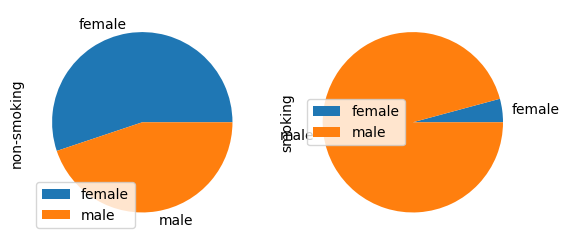

In [115]:
pd.crosstab(df2, df1,
            normalize = True).plot(kind = "pie", subplots = True, stacked=True)
plt.savefig('plot/gender_smoking.jpg')
plt.show()

##### 数值型变量

In [121]:
np.round(data.describe().T,3) # 查看数据基本信息

count     mean     std    min    25%    50%    75%  \
age                  55692.0   44.183  12.071   20.0   40.0   40.0   55.0   
height(cm)           55692.0  164.649   9.195  130.0  160.0  165.0  170.0   
weight(kg)           55692.0   65.865  12.820   30.0   55.0   65.0   75.0   
waist(cm)            55692.0   82.046   9.274   51.0   76.0   82.0   88.0   
eyesight(left)       55692.0    1.013   0.487    0.1    0.8    1.0    1.2   
eyesight(right)      55692.0    1.007   0.486    0.1    0.8    1.0    1.2   
hearing(left)        55692.0    1.026   0.158    1.0    1.0    1.0    1.0   
hearing(right)       55692.0    1.026   0.160    1.0    1.0    1.0    1.0   
systolic             55692.0  121.494  13.676   71.0  112.0  120.0  130.0   
relaxation           55692.0   76.005   9.679   40.0   70.0   76.0   82.0   
fasting blood sugar  55692.0   99.312  20.796   46.0   89.0   96.0  104.0   
Cholesterol          55692.0  196.901  36.298   55.0  172.0  195.0  220.0   
triglyceride         55692.0  126.666  71.640    8.0   74.0  108.0  160.0   
HDL                  55692.0   57.290  14.739    4.0   47.0   55.0   66.0   
LDL                  55692.0  114.965  40.926    1.0   92.0  113.0  136.0   
hemoglobin           55692.0   14.623   1.564    4.9   13.6   14.8   15.8   
Urine protein        55692.0    1.087   0.405    1.0    1.0    1.0    1.0   
serum creatinine     55692.0    0.886   0.222    0.1    0.8    0.9    1.0   
AST                  55692.0   26.183  19.355    6.0   19.0   23.0   28.0   
ALT                  55692.0   27.036  30.948    1.0   15.0   21.0   31.0   
Gtp                  55692.0   39.952  50.291    1.0   17.0   25.0   43.0   
dental caries        55692.0    0.213   0.410    0.0    0.0    0.0    0.0   
smoking              55692.0    0.367   0.482    0.0    0.0    0.0    1.0   

                        max  
age                    85.0  
height(cm)            190.0  
weight(kg)            135.0  
waist(cm)             129.0  
eyesight(left)          9.9  
eyesight(right)         9.9  
hearing(left)           2.0  
hearing(right)          2.0  
systolic              240.0  
relaxation            146.0  
fasting blood sugar   505.0  
Cholesterol           445.0  
triglyceride          999.0  
HDL                   618.0  
LDL                  1860.0  
hemoglobin             21.1  
Urine protein           6.0  
serum creatinine       11.6  
AST                  1311.0  
ALT                  2914.0  
Gtp                   999.0  
dental caries           1.0  
smoking                 1.0

In [76]:
# 视力
a = data.shape[0]
print(data['eyesight(left)'].unique()) 
data = data[data['eyesight(left)']!=9.9] #删除异常值
data = data[data['eyesight(right)']!=9.9]
b = data.shape[0]
print(f'delete outliners:{a-b}')

[1.2 0.8 1.5 1.  0.7 0.9 0.3 0.2 0.1 0.6 0.4 0.5 2.  9.9 1.3 1.6 1.9 1.1
 1.8]
delete outliners:174


其他数据虽然也存在统计意义上的异常值，但符合生物学意义，有存在的合理性，能够增加数据的变异性，所以选择保留异常值。

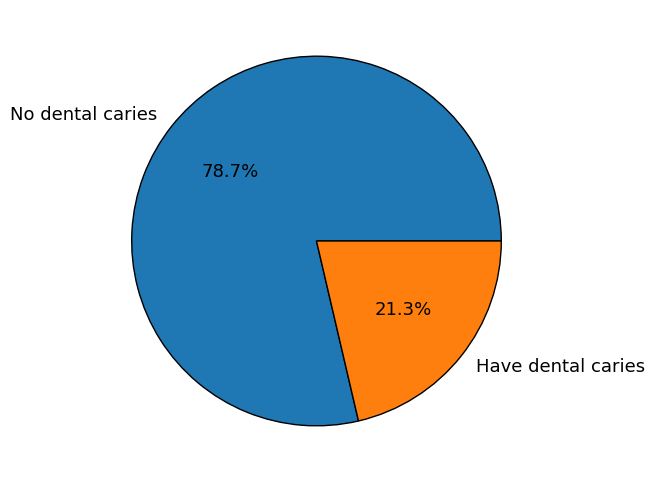

In [83]:
# 蛀牙
df5 = data['dental caries'].copy()
df5 = df5.apply(lambda x:'Have dental caries' if x==1.0 else 'No dental caries')
state_names=df5.value_counts().index
no_of_state=df5.value_counts()
plt.gcf().set_size_inches(6,6)
patches,l_text,p_text = plt.pie(no_of_state,labels=state_names,autopct="%1.1f%%",
        wedgeprops={'edgecolor':'black'},explode=[0,0])

for t in p_text:
    t.set_size(13)

for t in l_text:
    t.set_size(13)
plt.savefig('./plot/dental_pie.jpg')
plt.show()

In [91]:
data['gender'] = data['gender'].apply(lambda x: 1 if x=='M' else 0)
data['tartar'] = data['tartar'].apply(lambda x: 1 if x=='Y' else 0)
data.drop(['smoking'], axis=1, inplace=True)
scaler = StandardScaler() # 进行标准化
x_data_scaled = scaler.fit_transform(data)

In [93]:
x_data = pd.DataFrame(x_data_scaled, columns=data.columns)
x_data.drop(['gender', 'tartar'], axis=1).corr().style.background_gradient(cmap = "bwr")

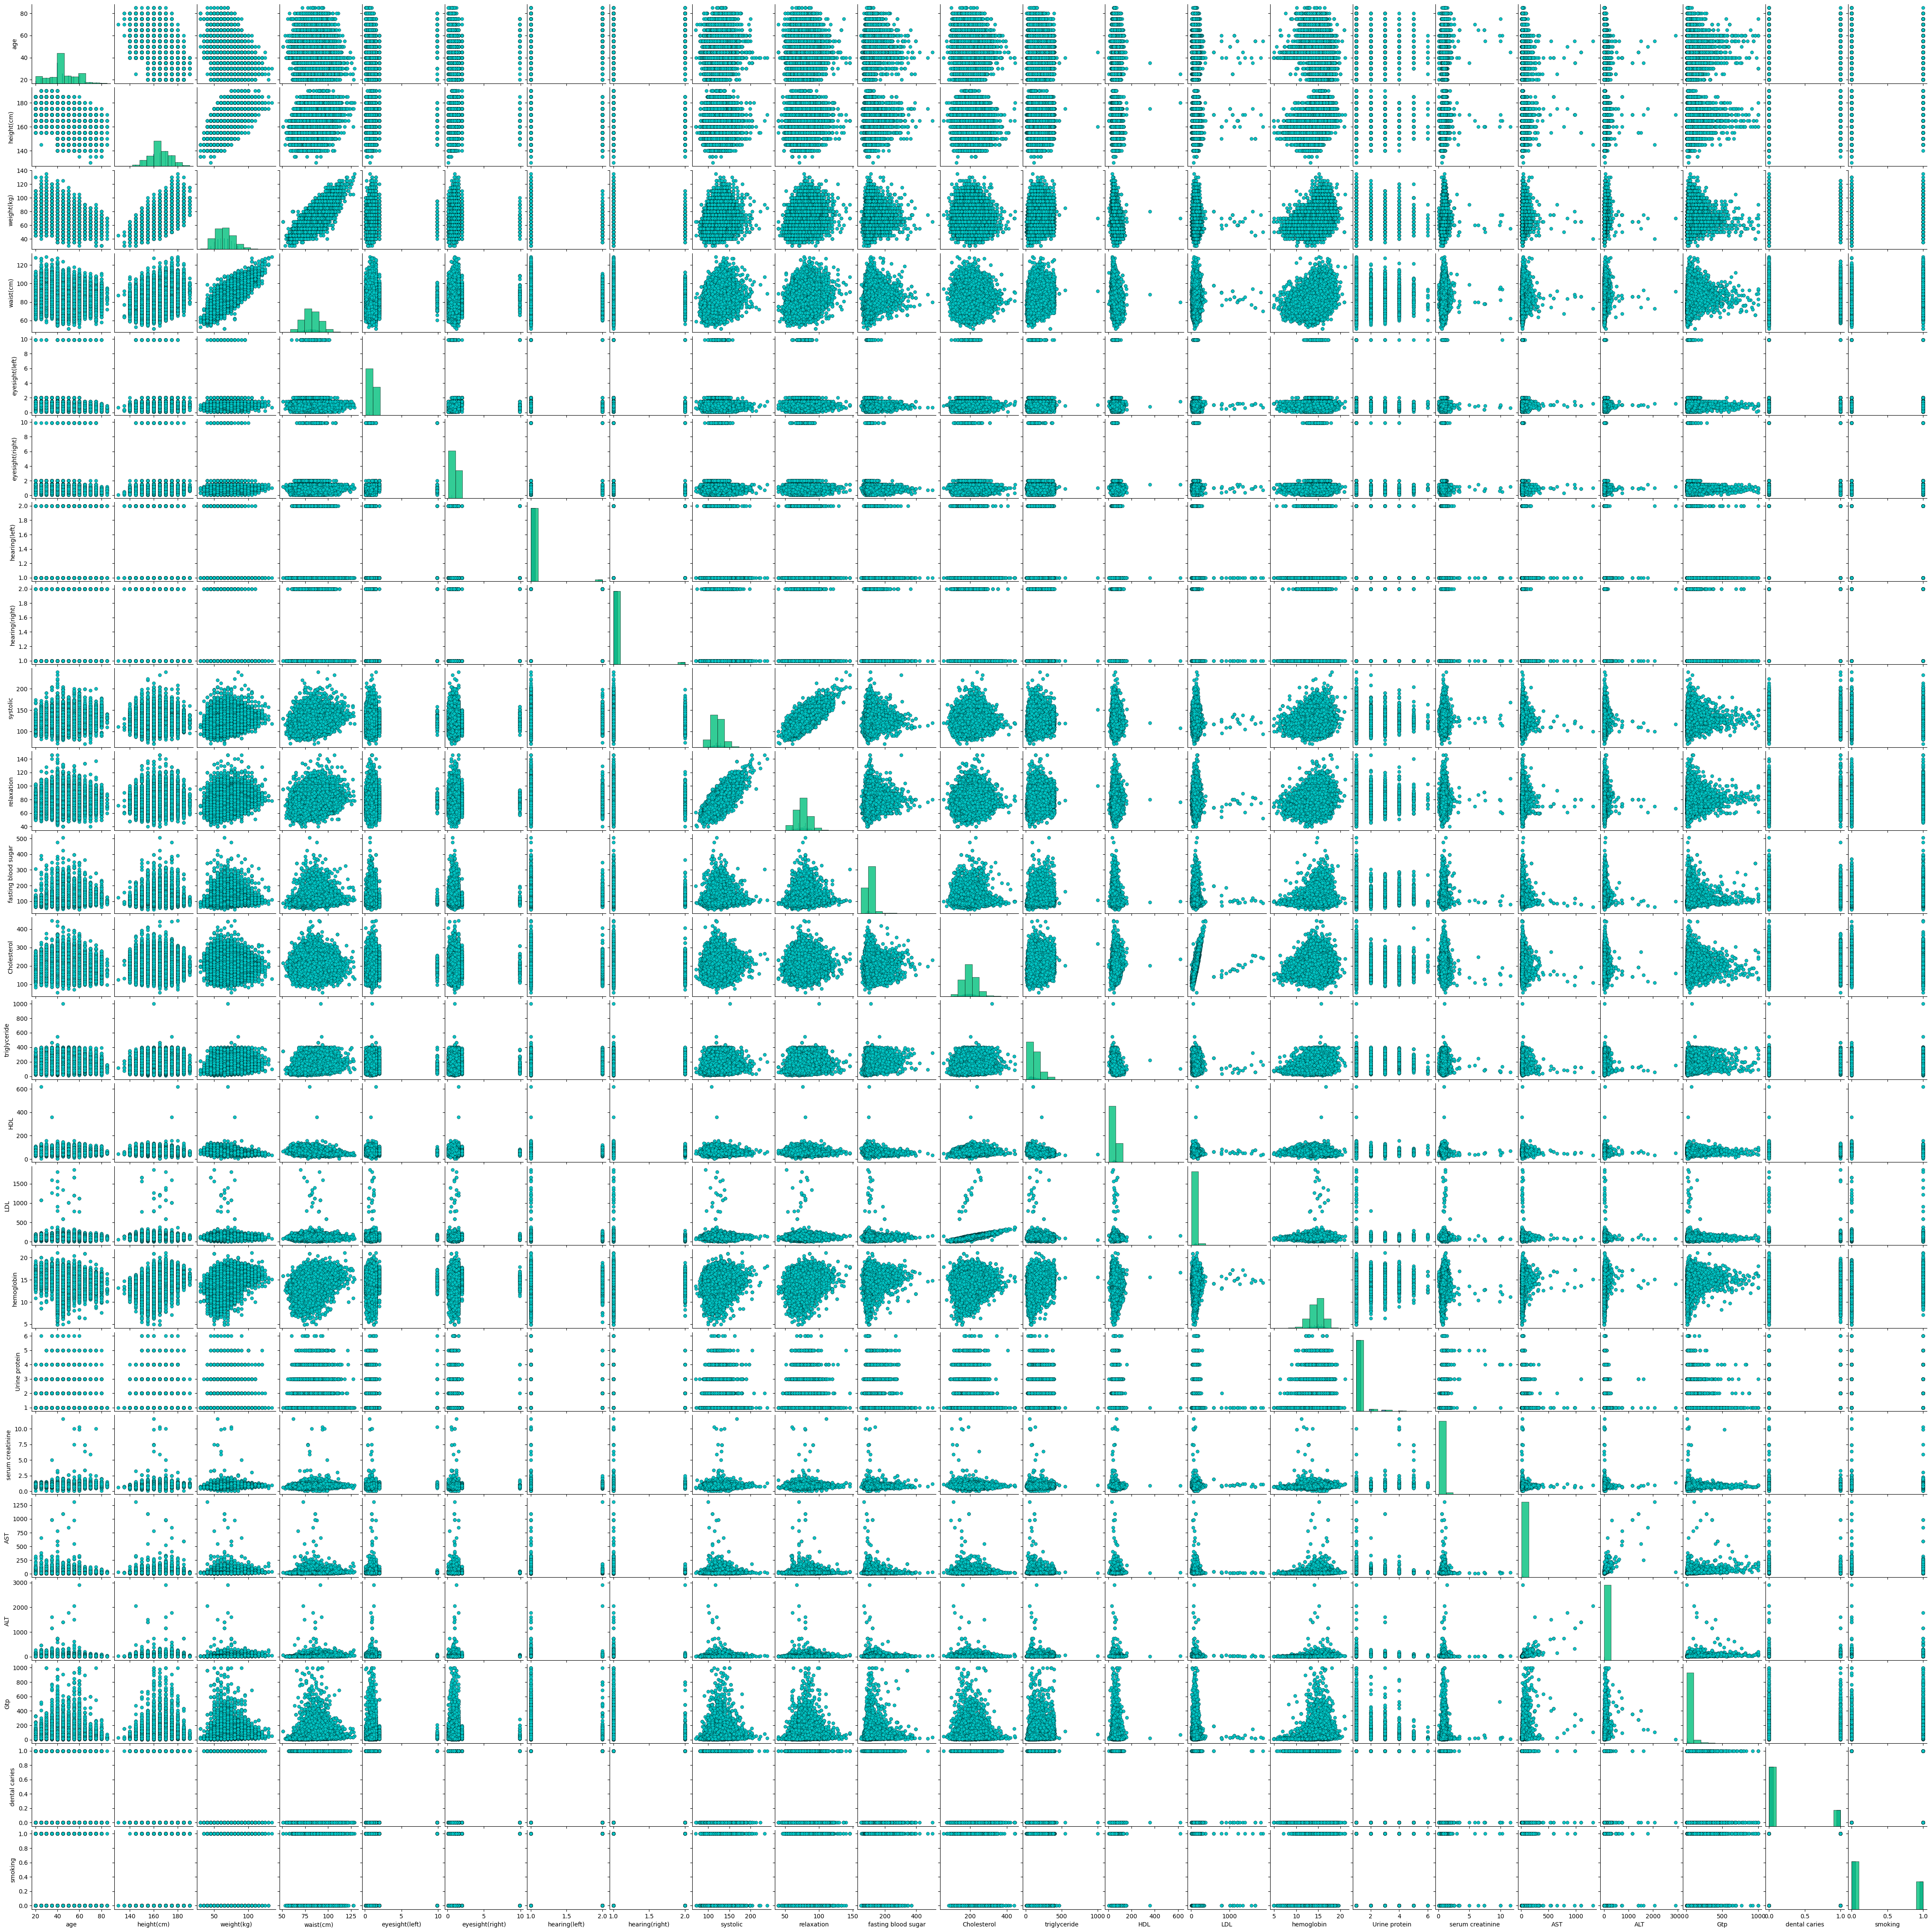

In [8]:
g=sns.pairplot(data, height=2)

g = g.map_diag(plt.hist,color='#00C07C',density=False,edgecolor="k",bins=10,alpha=0.8,linewidth=0.5)
g = g.map_offdiag(plt.scatter,color='#00C2C2',edgecolor="k", s=30,linewidth=0.25)

plt.subplots_adjust(hspace=0.05, wspace=0.05)